In [1]:
from HeaderP import *
import ytree
import pynbody as pb

In [2]:
a = ytree.load("g2.79e12_3x6/2.79e12.02000.parameter")
#fn = a.save_arbor()
#a = ytree.load(fn)


Additional features and improved performance (usually) by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("g2.79e12_3x6/2.79e12.02000.parameter")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [3]:
#halos = list(a.select_halos("tree['forest', 'mass'].to('Msun') > 5e11"))
#max(a['mass'].to('Msun')), (a['mass'].to('Msun')).argmax()

In [4]:
#a.field_info

In [5]:
#p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})


In [6]:
"""rs = pd.DataFrame(a['redshift'], columns=['redshift'])
rs = rs['redshift'].unique()"""

"rs = pd.DataFrame(a['redshift'], columns=['redshift'])\nrs = rs['redshift'].unique()"

In [7]:
"""ms = (a['redshift']==rs[-100])

for i in trange(len(rs)):
    m = (a['redshift']==rs[-i-1])
    plt.figure(figsize=(5,5))
    plt.plot(a['position_x'].to('kpc')[m]-a['position_x'].to('kpc')[0], 
             a['position_y'].to('kpc')[m]-a['position_y'].to('kpc')[0], 
             'k.', markersize=1)
    plt.xlim([-5000,5000])
    plt.ylim([-5000,5000])
    plt.savefig('mergertree_png/'+str(i)+'.png')
    plt.close()
"""

"ms = (a['redshift']==rs[-100])\n\nfor i in trange(len(rs)):\n    m = (a['redshift']==rs[-i-1])\n    plt.figure(figsize=(5,5))\n    plt.plot(a['position_x'].to('kpc')[m]-a['position_x'].to('kpc')[0], \n             a['position_y'].to('kpc')[m]-a['position_y'].to('kpc')[0], \n             'k.', markersize=1)\n    plt.xlim([-5000,5000])\n    plt.ylim([-5000,5000])\n    plt.savefig('mergertree_png/'+str(i)+'.png')\n    plt.close()\n"

In [8]:
#ls mergertree_png/

In [9]:
#p.min_mass_ratio = 0.01
#p.save('tree_small.png')

In [10]:
"""import os
f = os.listdir('g2.79e12_3x6')
f = [i for i in f if 'AHF_halos' in i]
for i in f:
    if i=='2.79e12.02000.z-0.000.AHF_halos':
        continue
    else:
        os.system('mv g2.79e12_3x6/'+i+' g2.79e12_3x6/'+i.split('.z-')[0]+'.z'+i.split('.z-')[1])"""

"import os\nf = os.listdir('g2.79e12_3x6')\nf = [i for i in f if 'AHF_halos' in i]\nfor i in f:\n    if i=='2.79e12.02000.z-0.000.AHF_halos':\n        continue\n    else:\n        os.system('mv g2.79e12_3x6/'+i+' g2.79e12_3x6/'+i.split('.z-')[0]+'.z'+i.split('.z-')[1])"

(-500.0, 500.0)

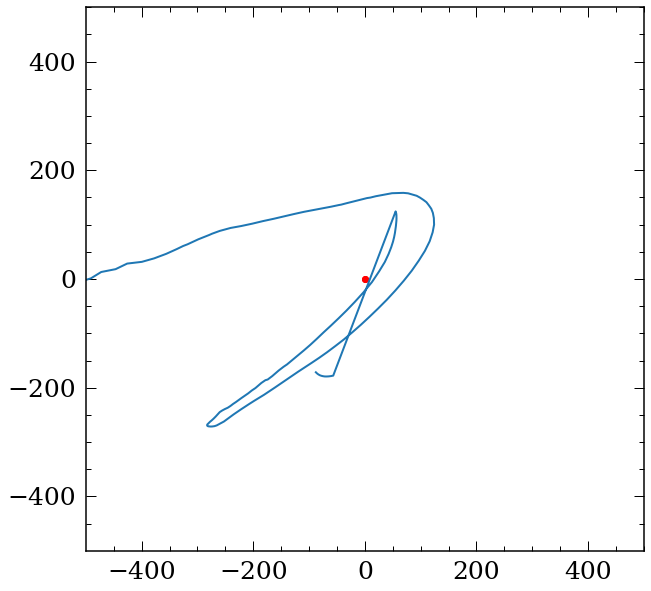

In [215]:
"""plt.plot(np.array(list(a[0]['prog','Xc'].to('kpc')))[:-7],
         np.array(list(a[0]['prog','Yc'].to('kpc')))[:-7])

plt.plot(np.array(list(a[187]['prog','Xc'].to('kpc'))),
         np.array(list(a[187]['prog','Yc'].to('kpc'))))
"""

plt.plot([0,0], 'ro')


plt.plot(np.array(list(a[187]['prog','Xc'].to('kpc')))-np.array(list(a[0]['prog','Xc'].to('kpc')))[:-2],
         np.array(list(a[187]['prog','Yc'].to('kpc')))-np.array(list(a[0]['prog','Yc'].to('kpc')))[:-2])

plt.xlim([-500,500])
plt.ylim([-500,500])

In [350]:
"""import pynbody as pb
s = pb.load('g2.79e12_3x6/2.79e12.02000')"""

"import pynbody as pb\ns = pb.load('g2.79e12_3x6/2.79e12.02000')"

In [351]:
#h = s.halos()

In [352]:
#h[1].properties['children']

In [11]:
"""alltimes_file = glob.glob('g2.79e12_3x6/2.79e12.0????')
alltimes_file = [i.split('2.79e12.')[-1] for i in alltimes_file]
alltimes_file_order = np.array(alltimes_file, dtype=int)
alltimes_file_order, alltimes_file = zip(*sorted(zip(alltimes_file_order, alltimes_file)))
len(alltimes_file)
"""

"alltimes_file = glob.glob('g2.79e12_3x6/2.79e12.0????')\nalltimes_file = [i.split('2.79e12.')[-1] for i in alltimes_file]\nalltimes_file_order = np.array(alltimes_file, dtype=int)\nalltimes_file_order, alltimes_file = zip(*sorted(zip(alltimes_file_order, alltimes_file)))\nlen(alltimes_file)\n"

In [12]:
"""import ytree
import numpy as np
import pynbody as pb

#a = ytree.load('./g2.79e12_3x6/2.79e12.02000.parameter', hubble_constant=0.67)
allids = []
eldids = []
haloxs = []
haloys = []
halozs = []
simnameread = []

proglist = list(a[0]['prog'])
for i in trange(len(proglist)-1):
    prog_mass = proglist[i]['mass']
    prog_star = proglist[i]['M_star']
    #ratio = [x['M_star']/prog_star for x in list(node.ancestors)]
    if i == 0:
        good = [x for x in list(proglist[i].ancestors) if 0.75 > x['M_star']/prog_star > 0.00001]
        #print(good)
    if i>0:
        goodnew = [x for x in list(proglist[i].ancestors) if 0.75 > x['M_star']/prog_star > 0.00001]
        #print(goodnew)
        good_diff = list(set(good) - set(goodnew))
        good = goodnew
        snap_fn = list(proglist[i].ancestors)[0].data_file
        sim_name = str(snap_fn)[:-10]
        s = pb.load(sim_name)
        h = s.halos()
        for halo in good_diff:
            #print(halo['ID'])
            id = halo['ID']+1 #pynbody and AHF IDs are offset by 1
            allids.append(id)
            eldids.append(i)
            simnameread.append(sim_name)
            #print(h[id])
            #np.save(sim_name+'.halo_'+str(id)+'_iords.npy',h[id].s['iord'])
            haloxs.append(h[id].properties['Xc'])
            haloys.append(h[id].properties['Yc'])
            halozs.append(h[id].properties['Zc'])
        
        """

"import ytree\nimport numpy as np\nimport pynbody as pb\n\n#a = ytree.load('./g2.79e12_3x6/2.79e12.02000.parameter', hubble_constant=0.67)\nallids = []\neldids = []\nhaloxs = []\nhaloys = []\nhalozs = []\nsimnameread = []\n\nproglist = list(a[0]['prog'])\nfor i in trange(len(proglist)-1):\n    prog_mass = proglist[i]['mass']\n    prog_star = proglist[i]['M_star']\n    #ratio = [x['M_star']/prog_star for x in list(node.ancestors)]\n    if i == 0:\n        good = [x for x in list(proglist[i].ancestors) if 0.75 > x['M_star']/prog_star > 0.00001]\n        #print(good)\n    if i>0:\n        goodnew = [x for x in list(proglist[i].ancestors) if 0.75 > x['M_star']/prog_star > 0.00001]\n        #print(goodnew)\n        good_diff = list(set(good) - set(goodnew))\n        good = goodnew\n        snap_fn = list(proglist[i].ancestors)[0].data_file\n        sim_name = str(snap_fn)[:-10]\n        s = pb.load(sim_name)\n        h = s.halos()\n        for halo in good_diff:\n            #print(halo['ID

In [441]:
import ytree
import numpy as np
import pynbody as pb

#a = ytree.load('./g2.79e12_3x6/2.79e12.02000.parameter', hubble_constant=0.67)
allids = []
eldids = []
haloxs = []
haloys = []
halozs = []
haloredshifts = []

boxsize = 0.6710431436818002
proglist = list(a[0]['prog'])

prog_redshift = [i['redshift'] for i in proglist]
prog_X = np.array([i['Xc'].to('kpc').value for i in proglist], dtype=float)
prog_Y = np.array([i['Yc'].to('kpc').value for i in proglist], dtype=float)
prog_Z = np.array([i['Zc'].to('kpc').value for i in proglist], dtype=float)

halo_disp_file = []
halo_app_file = []
halo_disp_id = []
halo_app_id = []

for i in trange(len(proglist)-1):
    prog_mass = proglist[i]['mass']
    prog_star = proglist[i]['M_star']

    #ratio = [x['M_star']/prog_star for x in list(node.ancestors)]
    good = [x for x in list(proglist[i].ancestors) if 0.75 > x['mass']/prog_mass > 0.01]
    
    for halo in good:
        redshifts = halo['prog','redshift']
        m = np.array([j in redshifts for j in prog_redshift], dtype=bool)
        
        m2 = (halo['prog','Xc'].to('kpc').value-prog_X[m])
        m2 = m2+(halo['prog','Yc'].to('kpc').value-prog_Y[m])
        m2 = m2+halo['prog','Zc'].to('kpc').value-prog_Z[m]
        m2 = (m2!=0)
        
        if sum(m2)==0:
            continue
        
        haloxs.append((halo['prog','Xc'].to('kpc').value-prog_X[m])[m2])
        haloys.append((halo['prog','Yc'].to('kpc').value-prog_Y[m])[m2])
        halozs.append((halo['prog','Zc'].to('kpc').value-prog_Z[m])[m2])
        haloredshifts.append(halo['prog','time'].to('Gyr').value[m2])
        
        prog_list_halo = list(np.array(list(halo['prog']))[m2])
        #print(prog_list_halo)
        
        #print(prog_list_halo[-1]['time'].to('Gyr')-prog_list_halo[0]['time'].to('Gyr'))
        
        halo_disp_file.append(str(prog_list_halo[0].data_file)[:-10]) # dissapear time data file
        halo_disp_id.append(prog_list_halo[0]['ID']) # dissapear ID
        
        halo_app_file.append(str(prog_list_halo[-1].data_file)[:-10]) # appear time data file
        halo_app_id.append(prog_list_halo[-1]['ID']) # appear ID
        
        

100%|██████████| 225/225 [00:00<00:00, 550.78it/s]


In [383]:
len(halo_app_file), len(haloxs)

(34, 34)

In [426]:
samehalos = []


# go into individual halos and check if any are the same halo
particleids = []

#
print('reading in # of particles...')
for i in trange(len(halo_app_file)):
    s_mainhalo = pb.load(halo_app_file[i])
    h = s_mainhalo.halos()
    particleids.append(list(h[halo_app_id[i]+1].dm['iord']))

rest_file = halo_app_file
rest_id = halo_app_id

for i in trange(len(halo_disp_file)):
    checkhalo_file = halo_disp_file[i]
    checkhalo_id = halo_disp_id[i] + 1
    
    s_mainhalo = pb.load(checkhalo_file)
    h = s_mainhalo.halos()
    allids = list(h[checkhalo_id].dm['iord'])
    
    print('checking halo:', checkhalo_id)
    print('checking halo file:', checkhalo_file)
    #print('halo list to check:',rest_id)
    if checkhalo_id in [i[1] for i in samehalos]:
        print('skipping halo', checkhalo_id)
        continue
    
    for j in range(len(rest_file)):
        if i==j:
            continue
        #s = pb.load(rest_file[j])
        #h = s.halos()
        #idcheck = h[rest_id[j]+1].g['iord']
        idcheck = particleids[j]
        #print('# gas particles:',len(idcheck))
        if len(set(allids) & set(list(idcheck)))/min([len(allids), len(idcheck)]) > 0.7:
            print('same halo:', i, j)
            print(rest_id[j]+1, checkhalo_id)
            print(rest_file[j], checkhalo_file)
            samehalos.append([i, j])
            
        
    
    """snap_fn = list(proglist[i].ancestors)[0].data_file
    sim_name = str(snap_fn)[:-10]
    s = pb.load(sim_name)
    h = s.halos()
    for halo in good:
        #print(halo['ID'])
        id = halo['ID']+1 #pynbody and AHF IDs are offset by 1
        allids.append(id)
        redshifts.append(prog_redshift)
        #print(h[id])
        #np.save(sim_name+'.halo_'+str(id)+'_iords.npy',h[id].s['iord'])
        haloxs.append(h[id].properties['Xc']/boxsize-progx.to('kpc').value)
        haloys.append(h[id].properties['Yc']/boxsize-progy.to('kpc').value)
        halozs.append(h[id].properties['Zc']/boxsize-progz.to('kpc').value)"""
        
        

reading in # of particles...


  3%|▎         | 1/34 [00:02<01:10,  2.14s/it]

checking halo: 3
checking halo file: ./g2.79e12_3x6/2.79e12.01620
same halo: 0 2
6 3
./g2.79e12_3x6/2.79e12.01480 ./g2.79e12_3x6/2.79e12.01620
same halo: 0 3
47 3
./g2.79e12_3x6/2.79e12.00040 ./g2.79e12_3x6/2.79e12.01620


  6%|▌         | 2/34 [00:04<01:09,  2.18s/it]

checking halo: 3
checking halo file: ./g2.79e12_3x6/2.79e12.01590
skipping halo 3


  9%|▉         | 3/34 [00:06<01:08,  2.21s/it]

checking halo: 2
checking halo file: ./g2.79e12_3x6/2.79e12.01510
skipping halo 2


 12%|█▏        | 4/34 [00:08<01:07,  2.26s/it]

checking halo: 2
checking halo file: ./g2.79e12_3x6/2.79e12.01400
skipping halo 2


 15%|█▍        | 5/34 [00:10<01:01,  2.11s/it]

checking halo: 10
checking halo file: ./g2.79e12_3x6/2.79e12.01220


 18%|█▊        | 6/34 [00:13<01:09,  2.48s/it]

checking halo: 2
checking halo file: ./g2.79e12_3x6/2.79e12.00450
skipping halo 2


 21%|██        | 7/34 [00:17<01:13,  2.71s/it]

checking halo: 2
checking halo file: ./g2.79e12_3x6/2.79e12.00430
skipping halo 2


 24%|██▎       | 8/34 [00:18<01:02,  2.39s/it]

checking halo: 17
checking halo file: ./g2.79e12_3x6/2.79e12.00400
same halo: 7 10
580 17
./g2.79e12_3x6/2.79e12.00179 ./g2.79e12_3x6/2.79e12.00400


 26%|██▋       | 9/34 [00:20<00:56,  2.24s/it]

checking halo: 17
checking halo file: ./g2.79e12_3x6/2.79e12.00390


 29%|██▉       | 10/34 [00:22<00:52,  2.18s/it]

checking halo: 2
checking halo file: ./g2.79e12_3x6/2.79e12.00380
skipping halo 2


 32%|███▏      | 11/34 [00:24<00:47,  2.07s/it]

checking halo: 11
checking halo file: ./g2.79e12_3x6/2.79e12.00380
same halo: 10 7
15 11
./g2.79e12_3x6/2.79e12.00393 ./g2.79e12_3x6/2.79e12.00380


 35%|███▌      | 12/34 [00:26<00:42,  1.93s/it]

checking halo: 39
checking halo file: ./g2.79e12_3x6/2.79e12.00310


 38%|███▊      | 13/34 [00:29<00:48,  2.30s/it]

checking halo: 3
checking halo file: ./g2.79e12_3x6/2.79e12.00300
skipping halo 3


 41%|████      | 14/34 [00:31<00:42,  2.12s/it]

checking halo: 52
checking halo file: ./g2.79e12_3x6/2.79e12.00230


 44%|████▍     | 15/34 [00:33<00:44,  2.33s/it]

checking halo: 34
checking halo file: ./g2.79e12_3x6/2.79e12.00168


 47%|████▋     | 16/34 [00:35<00:38,  2.12s/it]

checking halo: 46
checking halo file: ./g2.79e12_3x6/2.79e12.00150


 50%|█████     | 17/34 [00:36<00:32,  1.91s/it]

checking halo: 70
checking halo file: ./g2.79e12_3x6/2.79e12.00150


 53%|█████▎    | 18/34 [00:40<00:35,  2.25s/it]

checking halo: 153
checking halo file: ./g2.79e12_3x6/2.79e12.00140


 56%|█████▌    | 19/34 [00:41<00:30,  2.05s/it]

checking halo: 33
checking halo file: ./g2.79e12_3x6/2.79e12.00133


 59%|█████▉    | 20/34 [00:43<00:26,  1.92s/it]

checking halo: 81
checking halo file: ./g2.79e12_3x6/2.79e12.00133


 62%|██████▏   | 21/34 [00:44<00:23,  1.81s/it]

checking halo: 141
checking halo file: ./g2.79e12_3x6/2.79e12.00133
same halo: 20 23
23 141
./g2.79e12_3x6/2.79e12.00050 ./g2.79e12_3x6/2.79e12.00133


 65%|██████▍   | 22/34 [00:47<00:25,  2.12s/it]

checking halo: 253
checking halo file: ./g2.79e12_3x6/2.79e12.00130


 68%|██████▊   | 23/34 [00:49<00:21,  1.99s/it]

checking halo: 83
checking halo file: ./g2.79e12_3x6/2.79e12.00120


 71%|███████   | 24/34 [00:50<00:18,  1.82s/it]

checking halo: 30
checking halo file: ./g2.79e12_3x6/2.79e12.00110
same halo: 23 20
141 30
./g2.79e12_3x6/2.79e12.00133 ./g2.79e12_3x6/2.79e12.00110


 74%|███████▎  | 25/34 [00:52<00:15,  1.75s/it]

checking halo: 8
checking halo file: ./g2.79e12_3x6/2.79e12.00100
same halo: 24 19
81 8
./g2.79e12_3x6/2.79e12.00133 ./g2.79e12_3x6/2.79e12.00100
same halo: 24 25
635 8
./g2.79e12_3x6/2.79e12.00070 ./g2.79e12_3x6/2.79e12.00100


 76%|███████▋  | 26/34 [00:53<00:13,  1.66s/it]

checking halo: 16
checking halo file: ./g2.79e12_3x6/2.79e12.00080
same halo: 25 30
179 16
./g2.79e12_3x6/2.79e12.00040 ./g2.79e12_3x6/2.79e12.00080
same halo: 25 31
100 16
./g2.79e12_3x6/2.79e12.00040 ./g2.79e12_3x6/2.79e12.00080


 79%|███████▉  | 27/34 [00:55<00:11,  1.64s/it]

checking halo: 75
checking halo file: ./g2.79e12_3x6/2.79e12.00080


 82%|████████▏ | 28/34 [00:56<00:09,  1.62s/it]

checking halo: 9
checking halo file: ./g2.79e12_3x6/2.79e12.00070


 85%|████████▌ | 29/34 [00:58<00:07,  1.60s/it]

checking halo: 31
checking halo file: ./g2.79e12_3x6/2.79e12.00060
skipping halo 31


 88%|████████▊ | 30/34 [00:59<00:06,  1.57s/it]

checking halo: 234
checking halo file: ./g2.79e12_3x6/2.79e12.00060


 91%|█████████ | 31/34 [01:01<00:04,  1.55s/it]

checking halo: 21
checking halo file: ./g2.79e12_3x6/2.79e12.00050


 94%|█████████▍| 32/34 [01:03<00:03,  1.54s/it]

checking halo: 63
checking halo file: ./g2.79e12_3x6/2.79e12.00050


 97%|█████████▋| 33/34 [01:04<00:01,  1.53s/it]

checking halo: 121
checking halo file: ./g2.79e12_3x6/2.79e12.00050


100%|██████████| 34/34 [01:05<00:00,  1.94s/it]

checking halo: 131
checking halo file: ./g2.79e12_3x6/2.79e12.00050


In [430]:
halomix = []
checklists = np.zeros(len(samehalos), dtype=bool)
count = 0
for i in range(len(samehalos)):
    if i ==0:
        halomix.append(samehalos[0])
        checklists[i] = True
        for j in np.array(range(len(samehalos)))[~checklists]:
            if len(set(list(samehalos[j])) & set(halomix[i]))>0:
                halomix[i] = halomix[i]+list(samehalos[j])
                checklists[j] = True
    else:
        if min(checklists) == 0:
            halomix.append(samehalos[checklists.argmin()])
            checklists[checklists.argmin()] = 1
            count = count+1
            for j in np.array(range(len(samehalos)))[~checklists]:
                if len(set(list(samehalos[j])) & set(halomix[count]))>0:
                    halomix[count] = halomix[count]+list(samehalos[j])
                    checklists[j] = True
                    
        else:
            break

for i in range(len(halomix)):
    halomix[i] = list(set(halomix[i]))

In [461]:
pwd

'/data/users/llu'

In [431]:
samehalos, halomix

([[0, 2],
  [0, 3],
  [7, 10],
  [10, 7],
  [20, 23],
  [23, 20],
  [24, 19],
  [24, 25],
  [25, 30],
  [25, 31]],
 [[0, 2, 3], [10, 7], [20, 23], [19, 24, 25, 30, 31]])

In [442]:

for j in range(len(halomix)):
    #print('j',len(halomix[j]))
    for i in range(len(halomix[j])-1):
        #print(i)
        haloxs[halomix[j][0]] = list(haloxs[halomix[j][0]])+list(haloxs[halomix[j][i+1]])
        haloys[halomix[j][0]] = list(haloys[halomix[j][0]])+list(haloys[halomix[j][i+1]])
        halozs[halomix[j][0]] = list(halozs[halomix[j][0]])+list(halozs[halomix[j][i+1]])
        haloredshifts[halomix[j][0]] = list(haloredshifts[halomix[j][0]])+list(haloredshifts[halomix[j][i+1]])

        haloxs[halomix[j][i+1]] = []
        haloys[halomix[j][i+1]] = []
        halozs[halomix[j][i+1]] = []
        haloredshifts[halomix[j][i+1]] = []
        
        #print(haloxs[halomix[j][0]])
            
    haloredshifts[halomix[j][0]], halozs[halomix[j][0]], haloys[halomix[j][0]], haloxs[halomix[j][0]] = zip(*sorted(zip(haloredshifts[halomix[j][0]], halozs[halomix[j][0]], haloys[halomix[j][0]], haloxs[halomix[j][0]])))
    haloredshifts[halomix[j][0]], halozs[halomix[j][0]], haloys[halomix[j][0]], haloxs[halomix[j][0]] = np.array(haloredshifts[halomix[j][0]]), np.array(halozs[halomix[j][0]]), np.array(haloys[halomix[j][0]]), np.array(haloxs[halomix[j][0]])
            
            
print(len(haloxs))
haloxs = [haloxs[i] for i in range(len(haloxs)) if len(haloxs[i])!=0]
haloys = [haloys[i] for i in range(len(haloys)) if len(haloys[i])!=0]
halozs = [halozs[i] for i in range(len(halozs)) if len(halozs[i])!=0]
haloredshifts = [haloredshifts[i] for i in range(len(haloredshifts)) if len(haloredshifts[i])!=0]
print(len(haloxs))
print('Difference between the last 2 numbers are', sum([len(i) for i in halomix])-len(halomix))
"""plt.scatter(one_halox, one_haloy, c=one_haloz, s=300)
plt.plot(one_halox, one_haloy, 'k--')
plt.plot(0, 0, 'k*', markersize=30)"""


34
26
Difference between the last 2 numbers are 8


"plt.scatter(one_halox, one_haloy, c=one_haloz, s=300)\nplt.plot(one_halox, one_haloy, 'k--')\nplt.plot(0, 0, 'k*', markersize=30)"

In [ ]:
haloredshifts = np.array(haloredshifts)
haloredshifts = 13.8-haloredshifts

/tmp/ipykernel_530993/4207733381.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,8))


"\nplt.figure(figsize=(10,8))\ncheckhalo = 10\nm = (haloredshifts[checkhalo]<3)\nplt.scatter(haloxs[checkhalo][m], haloys[checkhalo][m], c=haloredshifts[checkhalo][m], s=100)\nplt.plot(haloxs[checkhalo][m], haloys[checkhalo][m],'k--')\n\nplt.colorbar(label='redshift')\nplt.plot(0, 0, 'ro')\n\nplt.xlim([-500,500])\nplt.ylim([-500,500])"

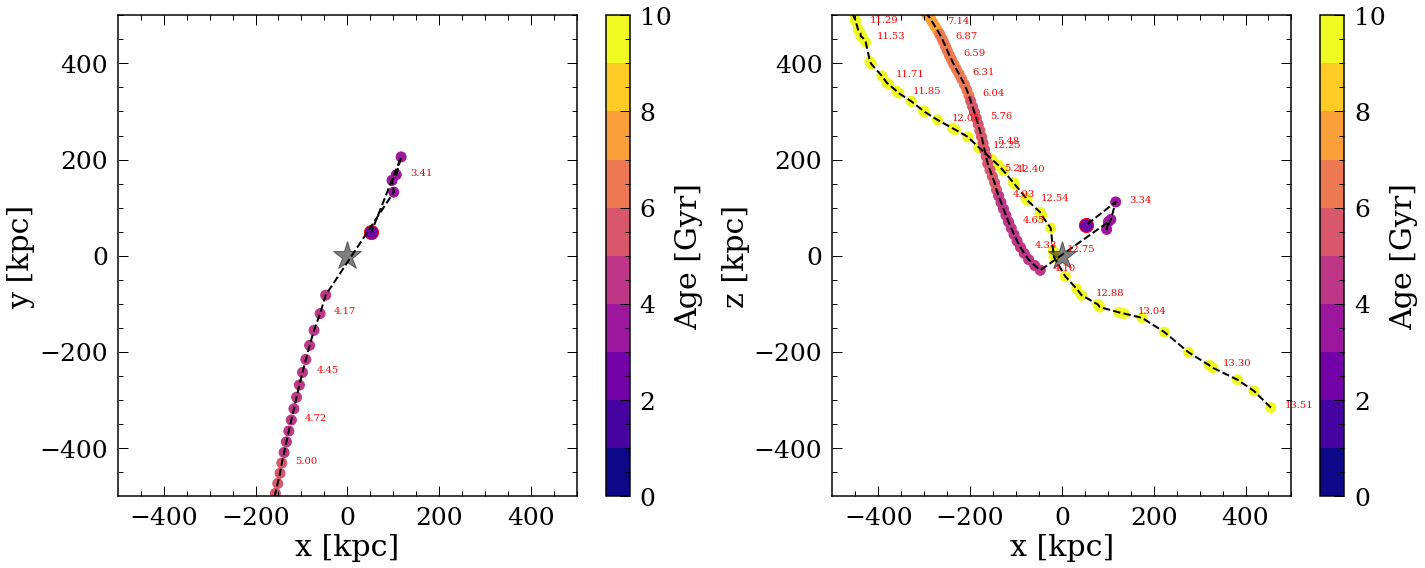

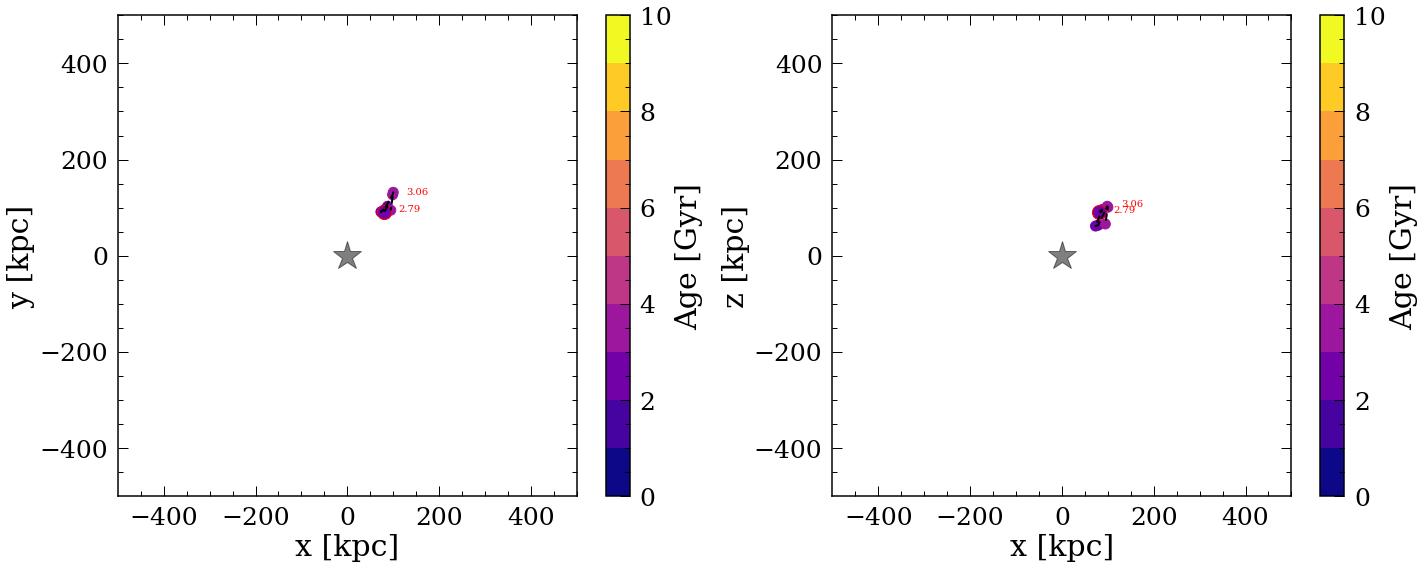

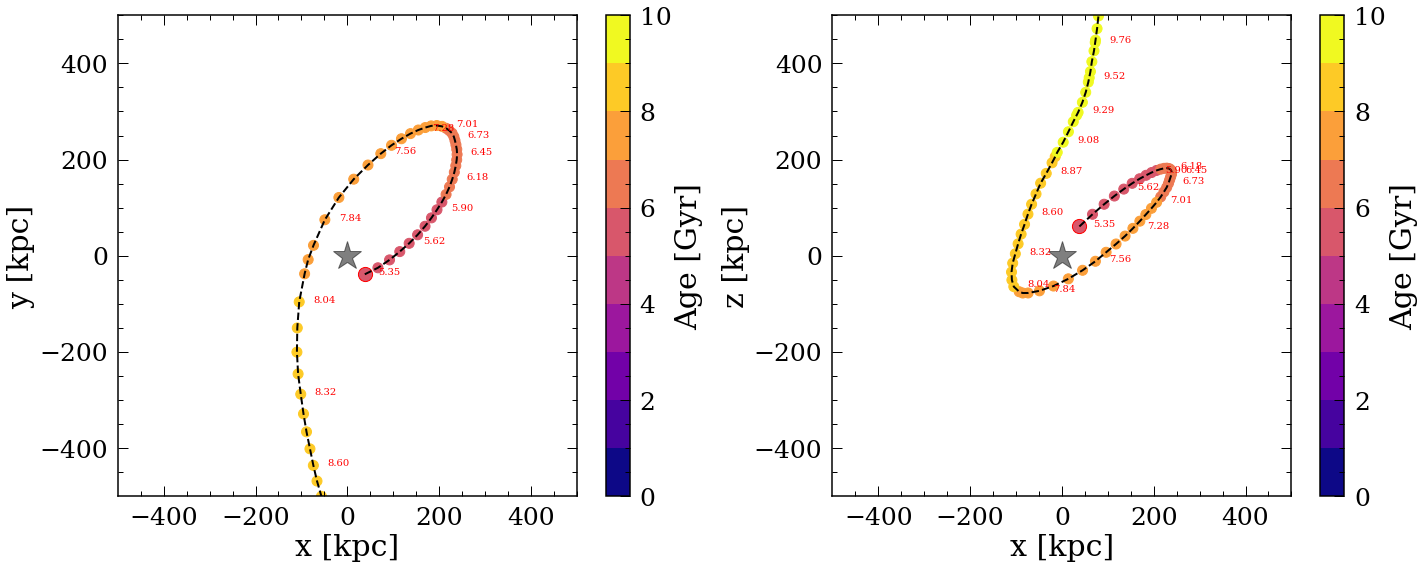

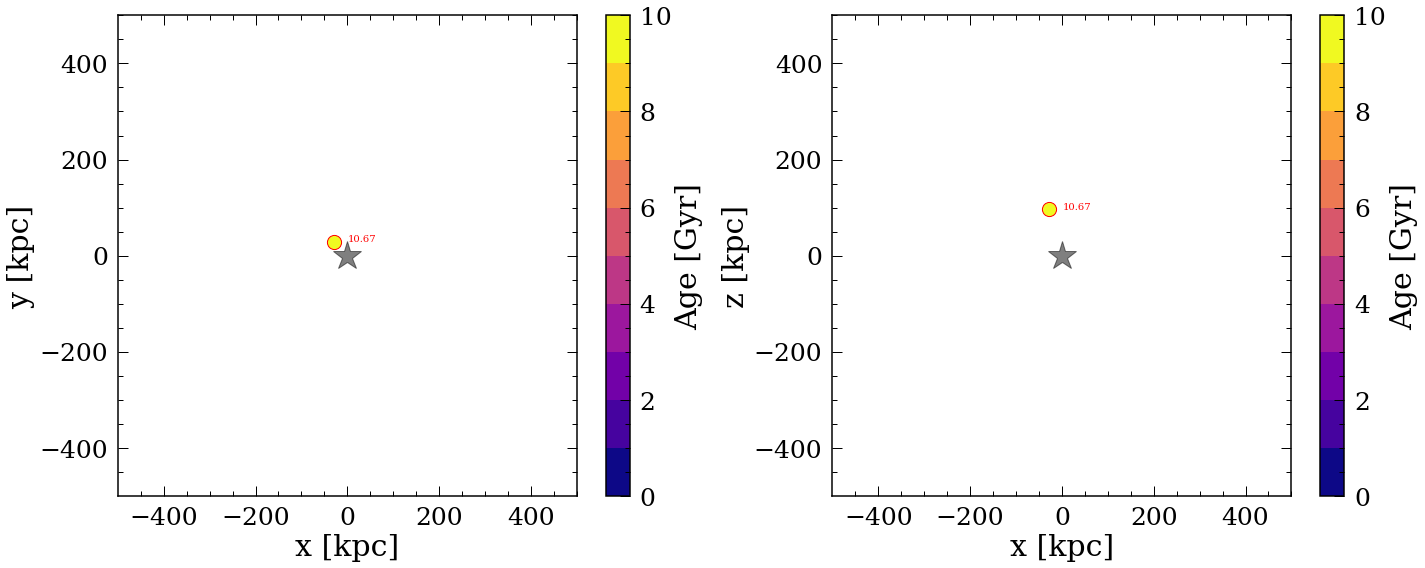

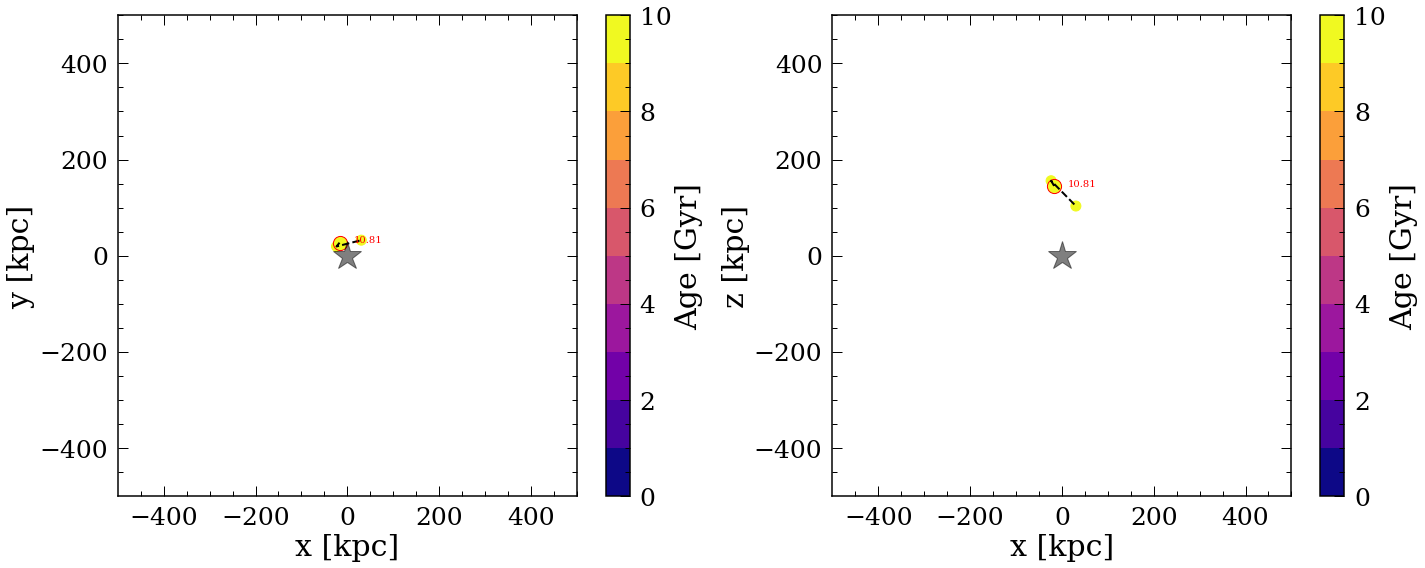

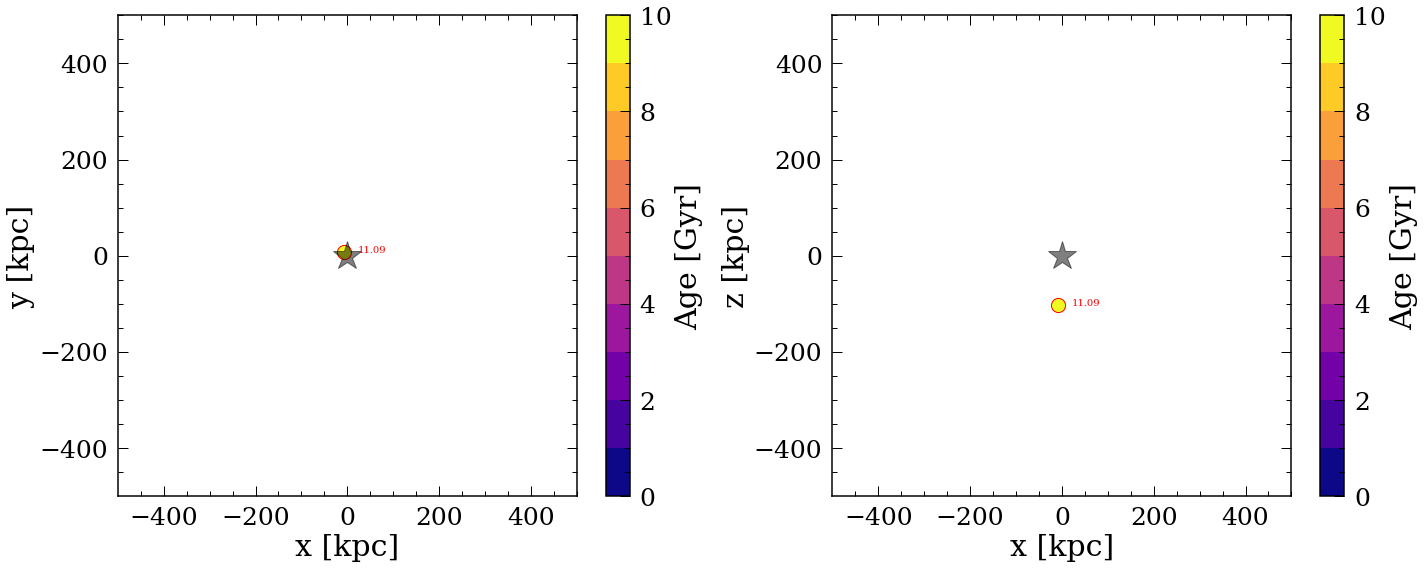

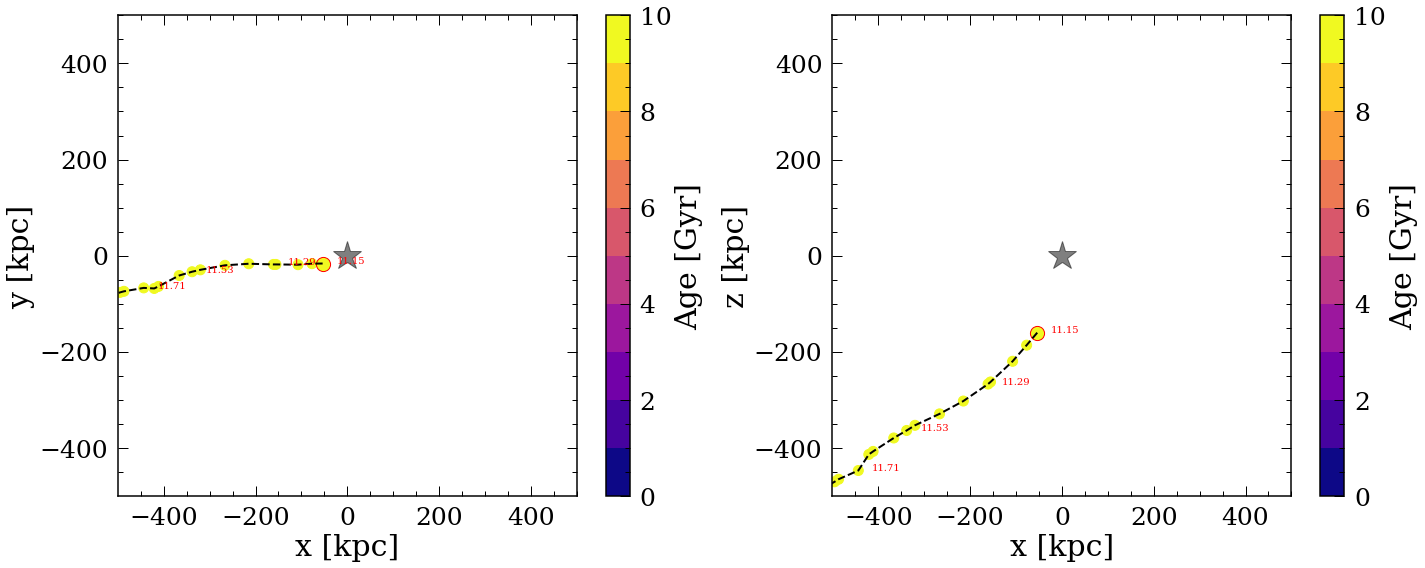

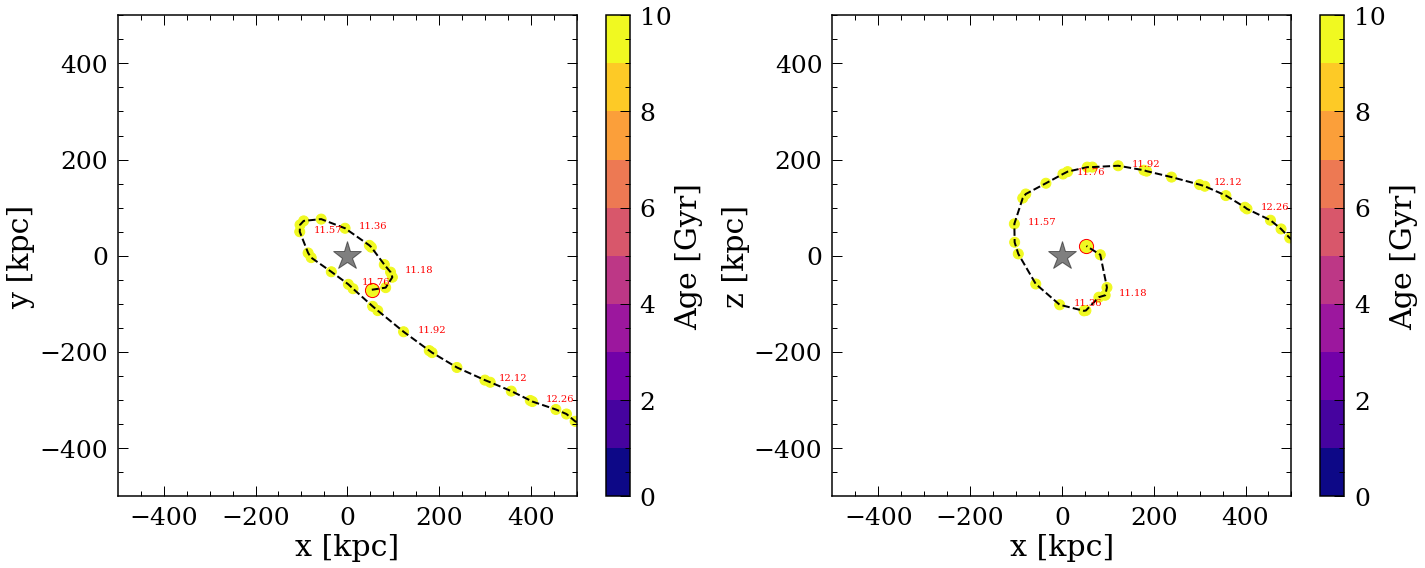

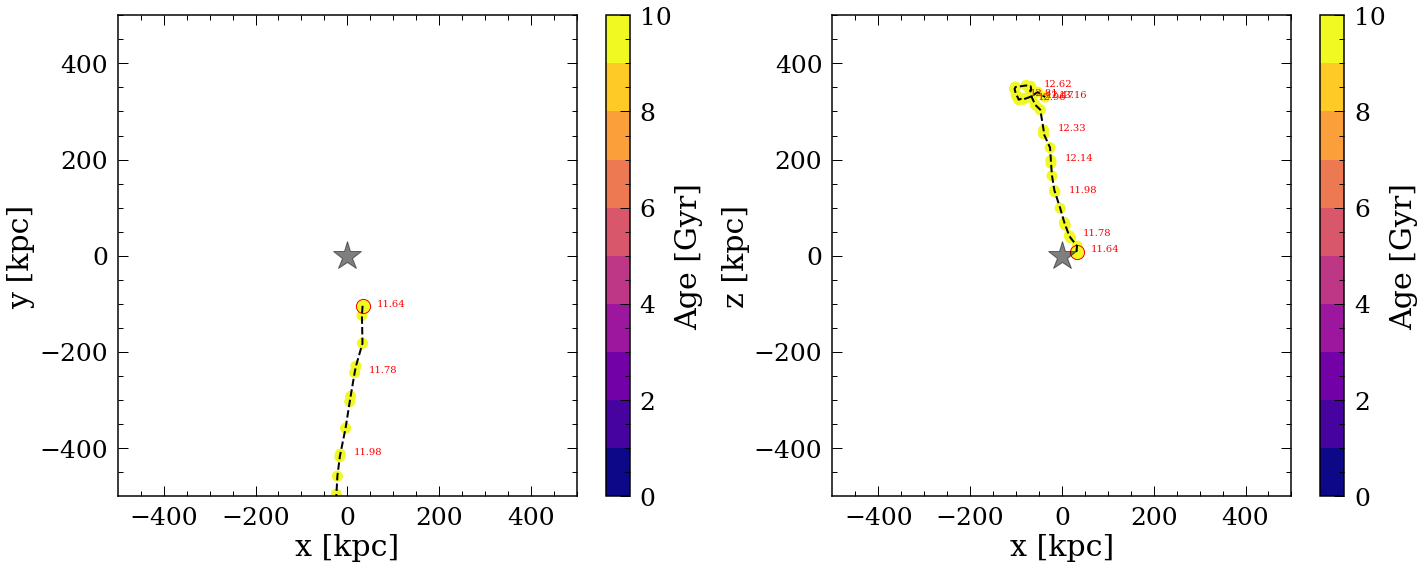

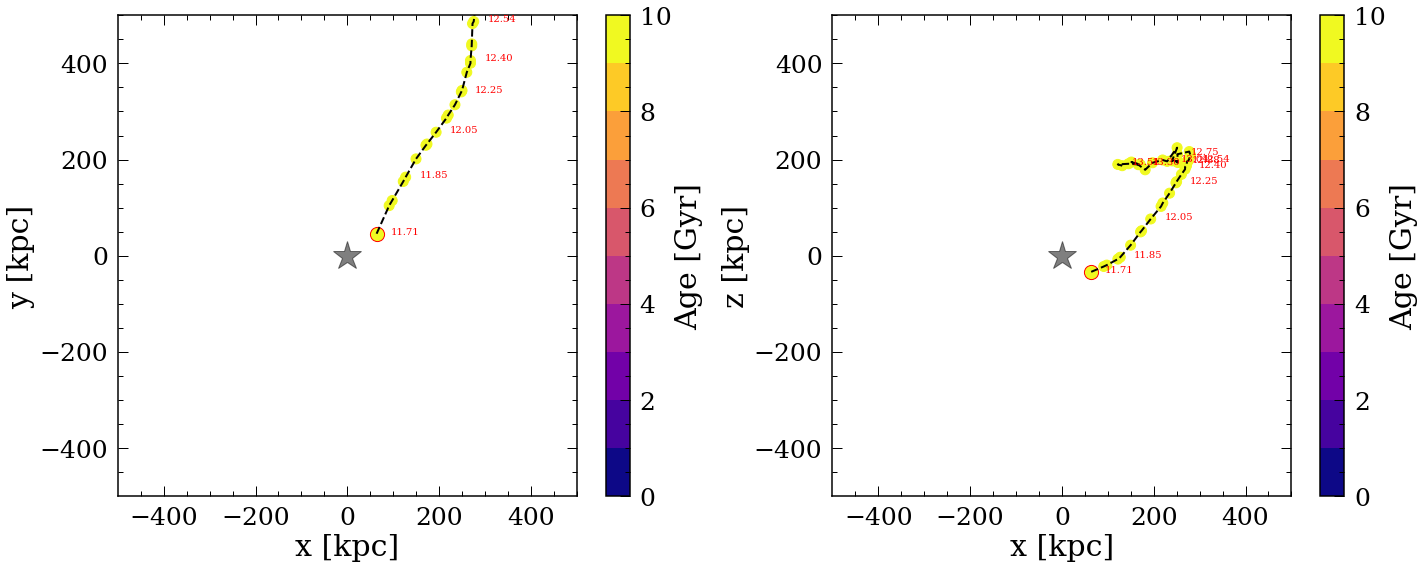

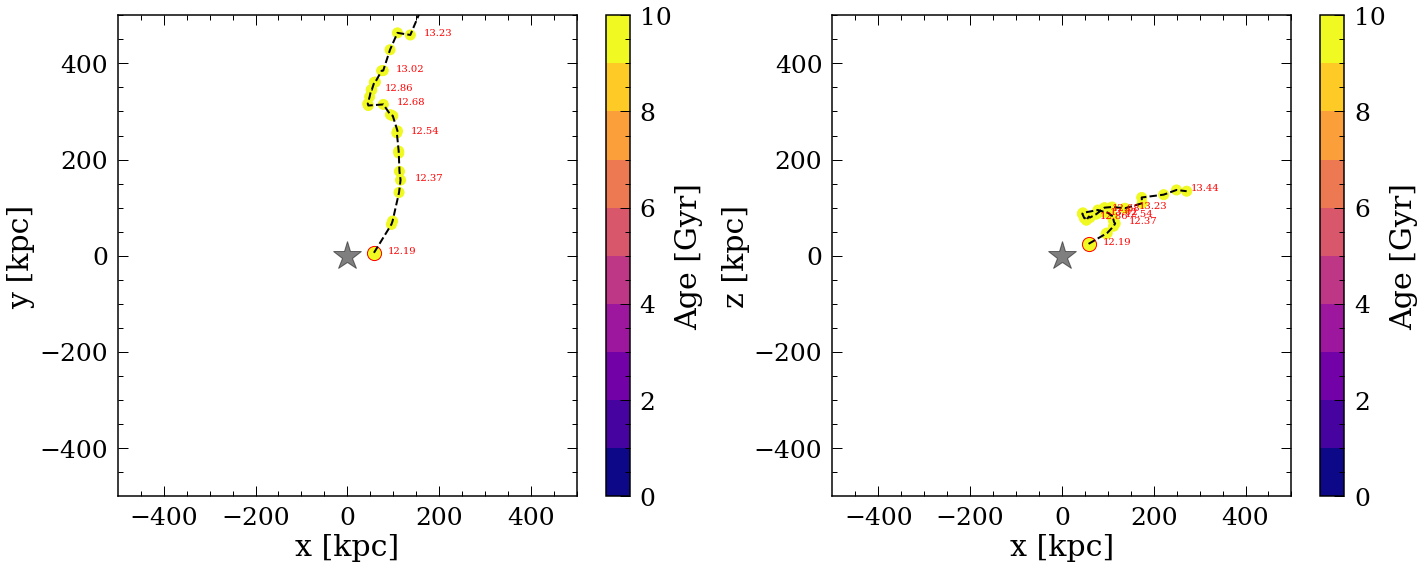

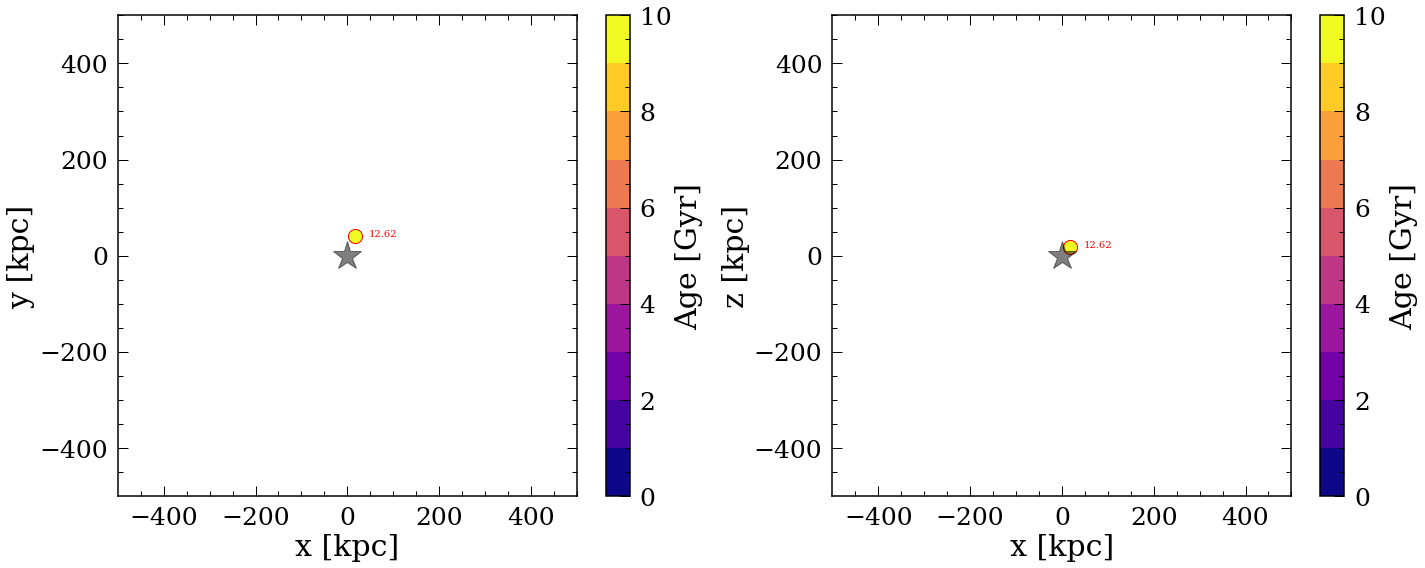

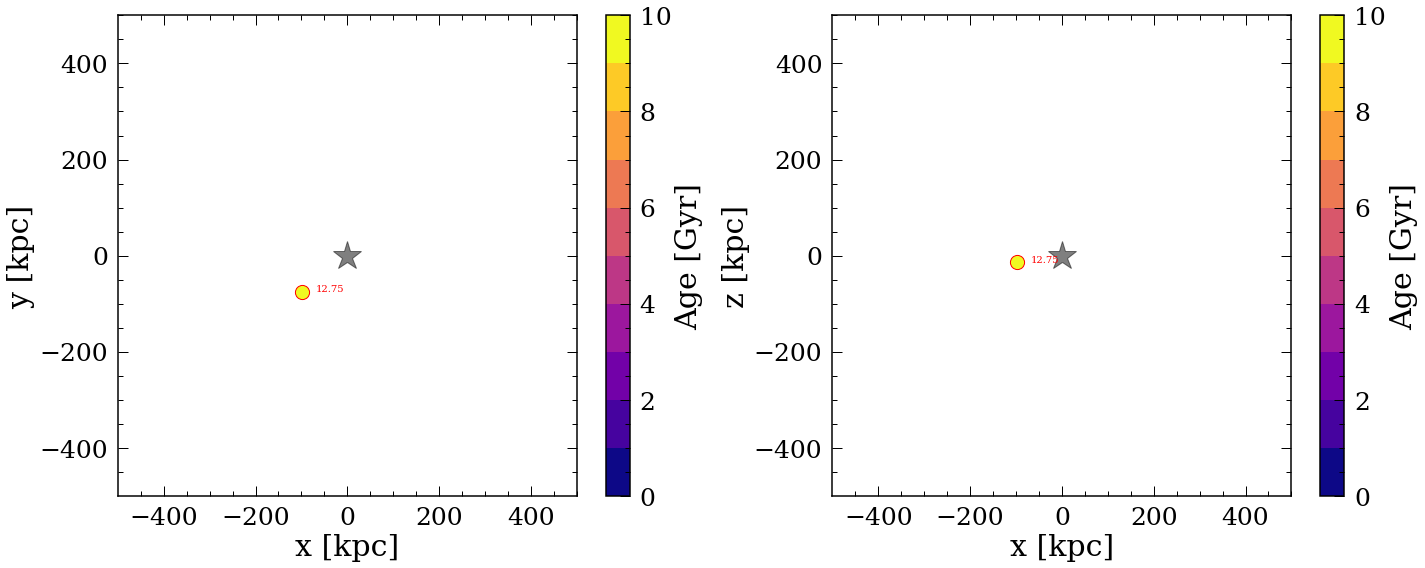

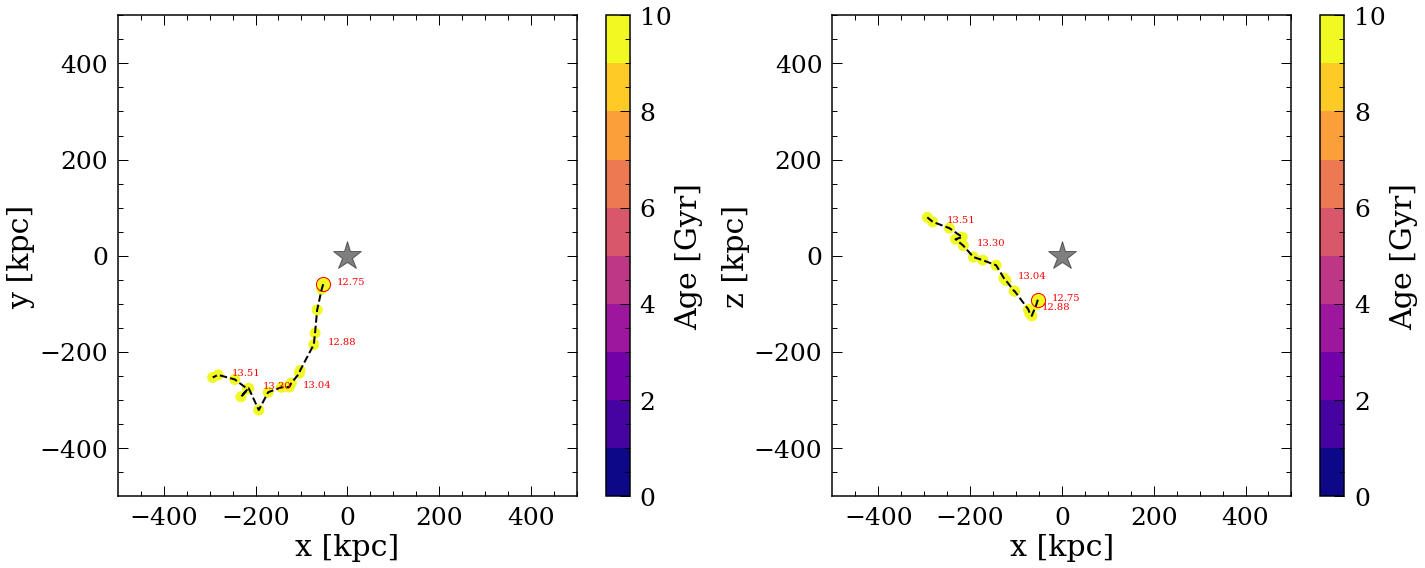

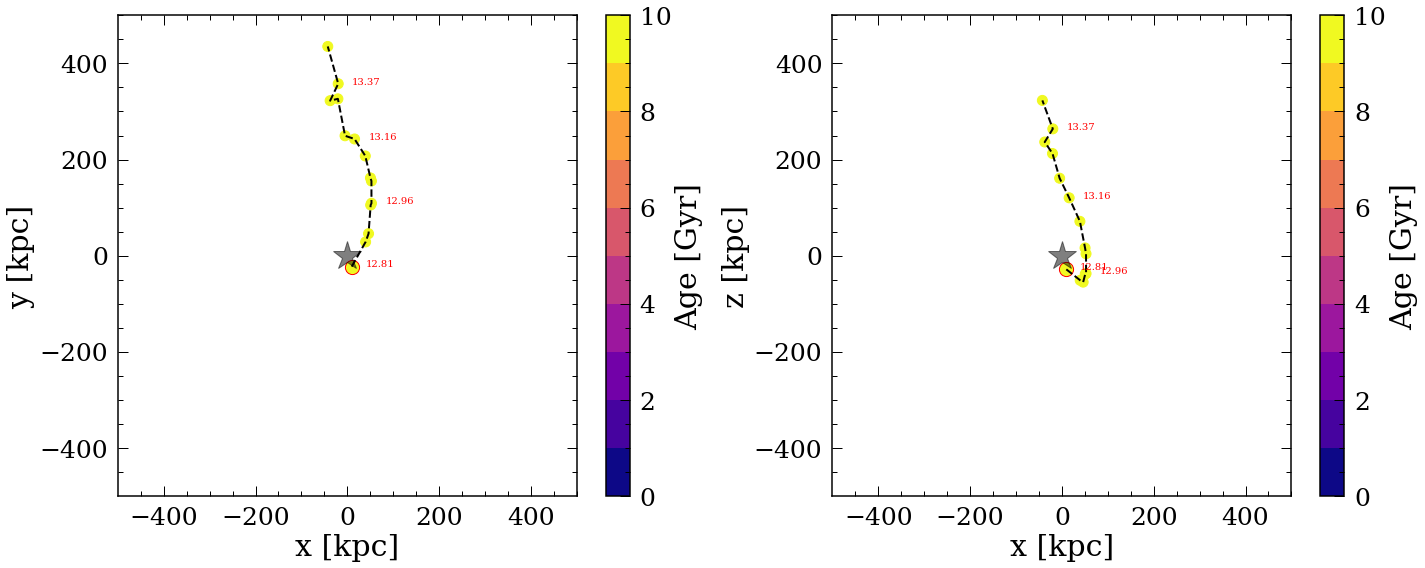

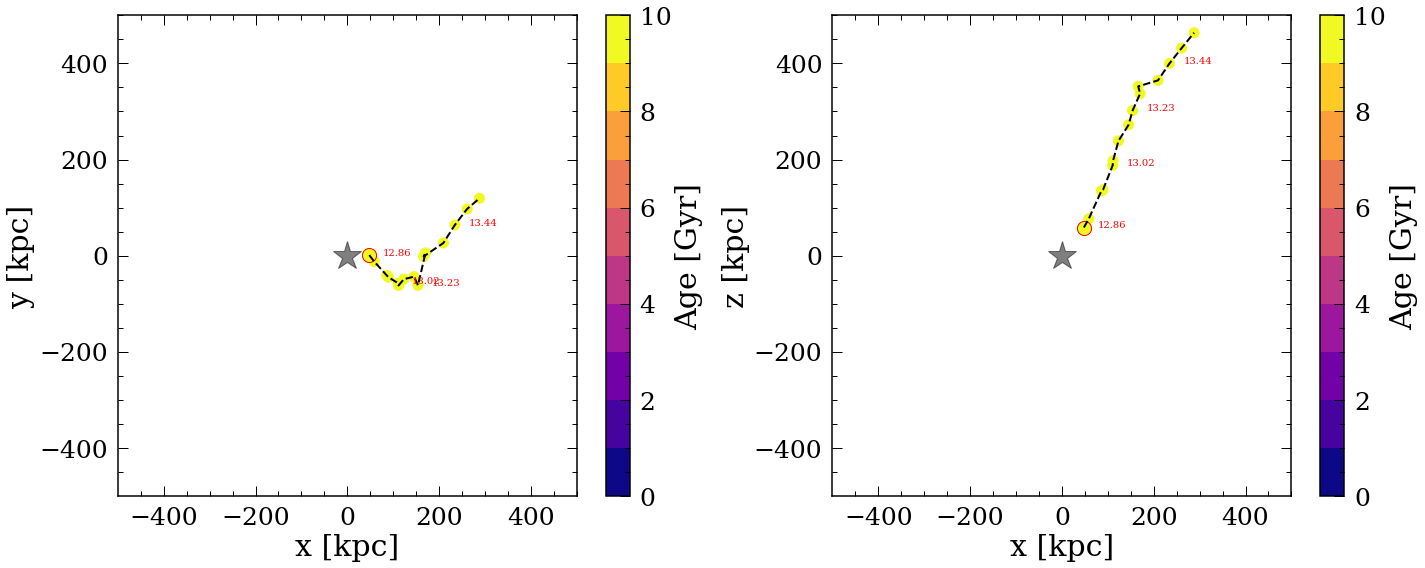

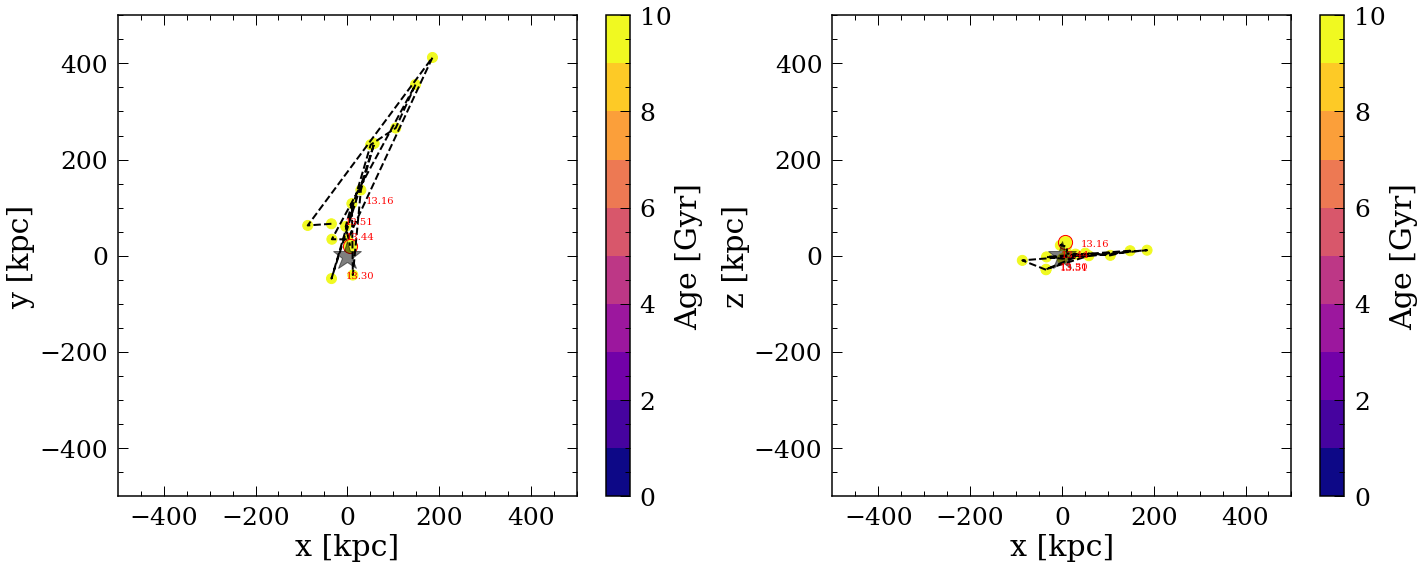

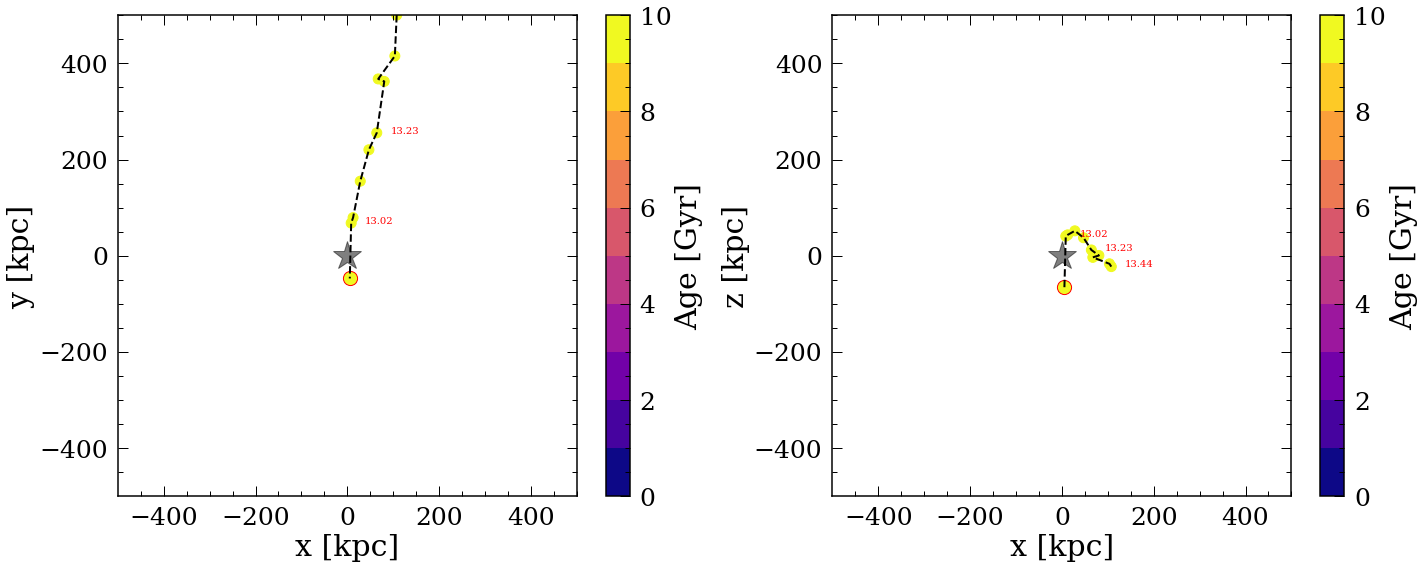

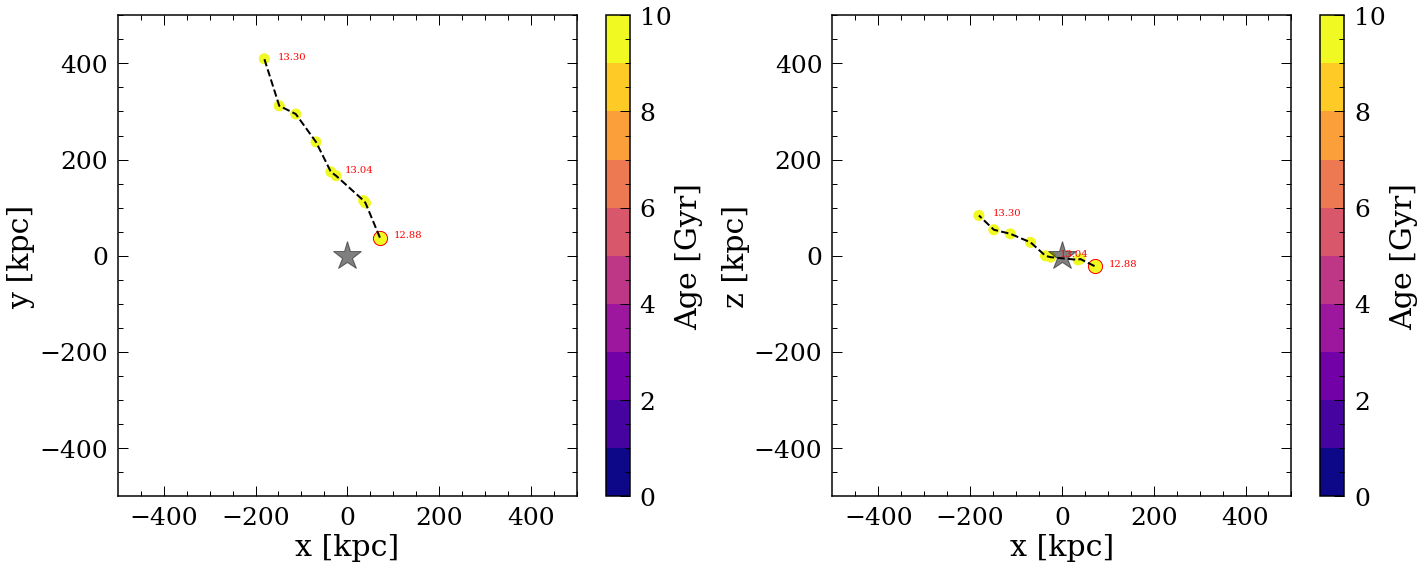

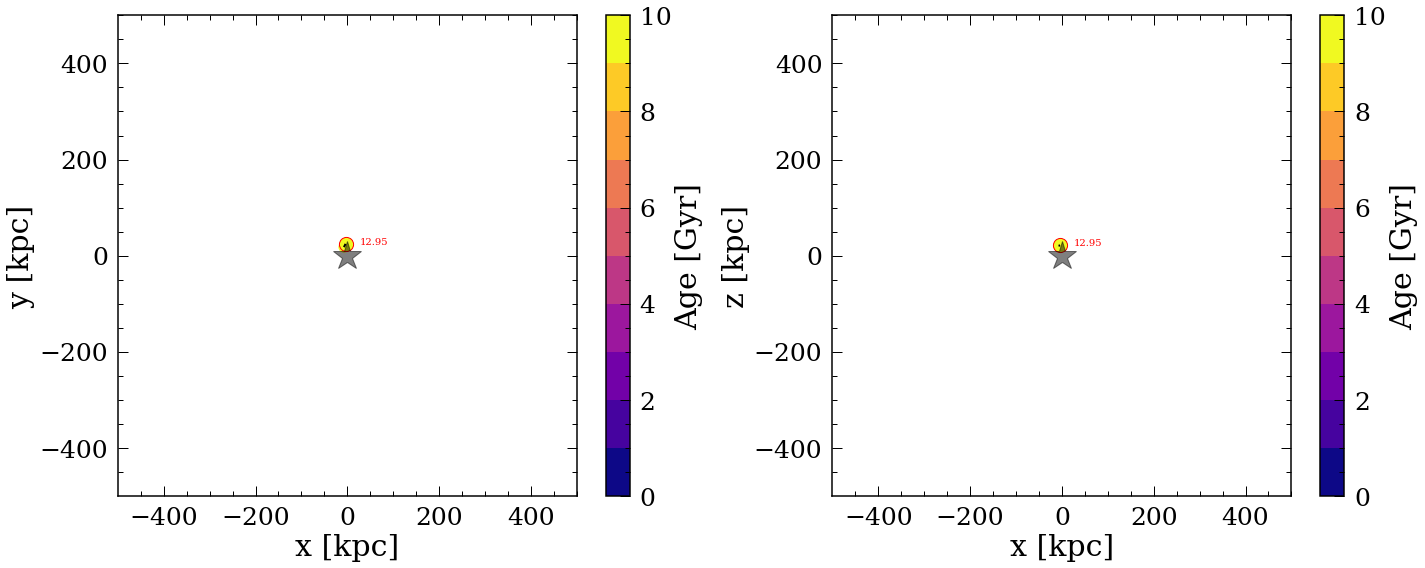

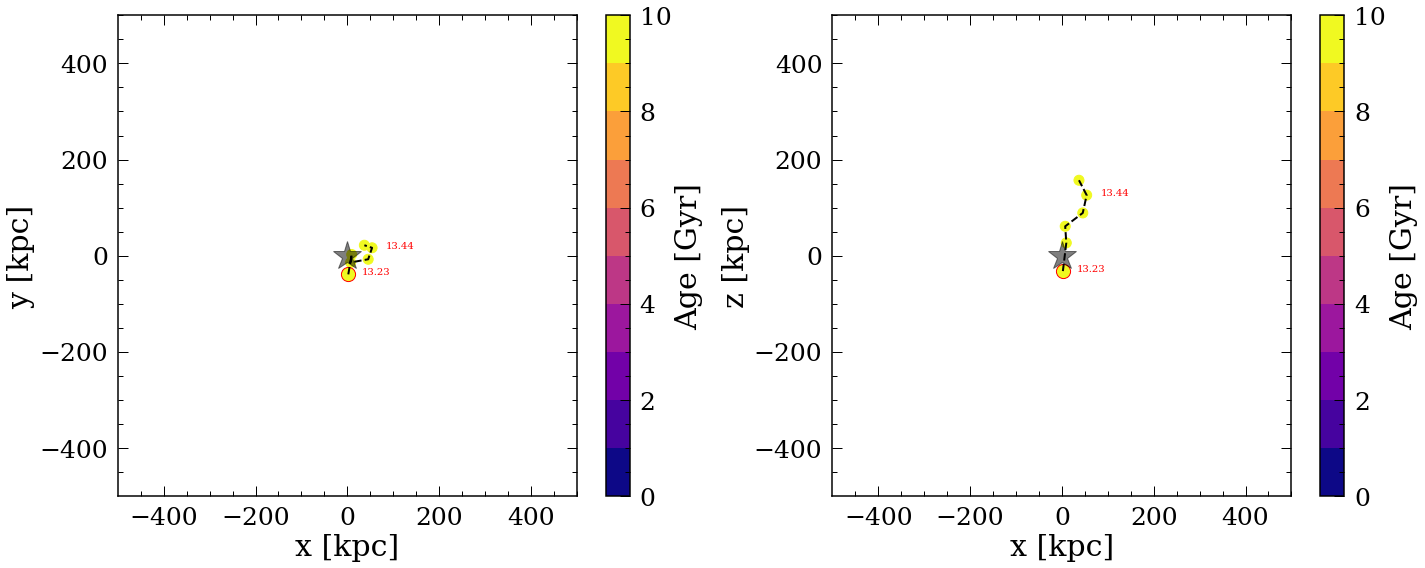

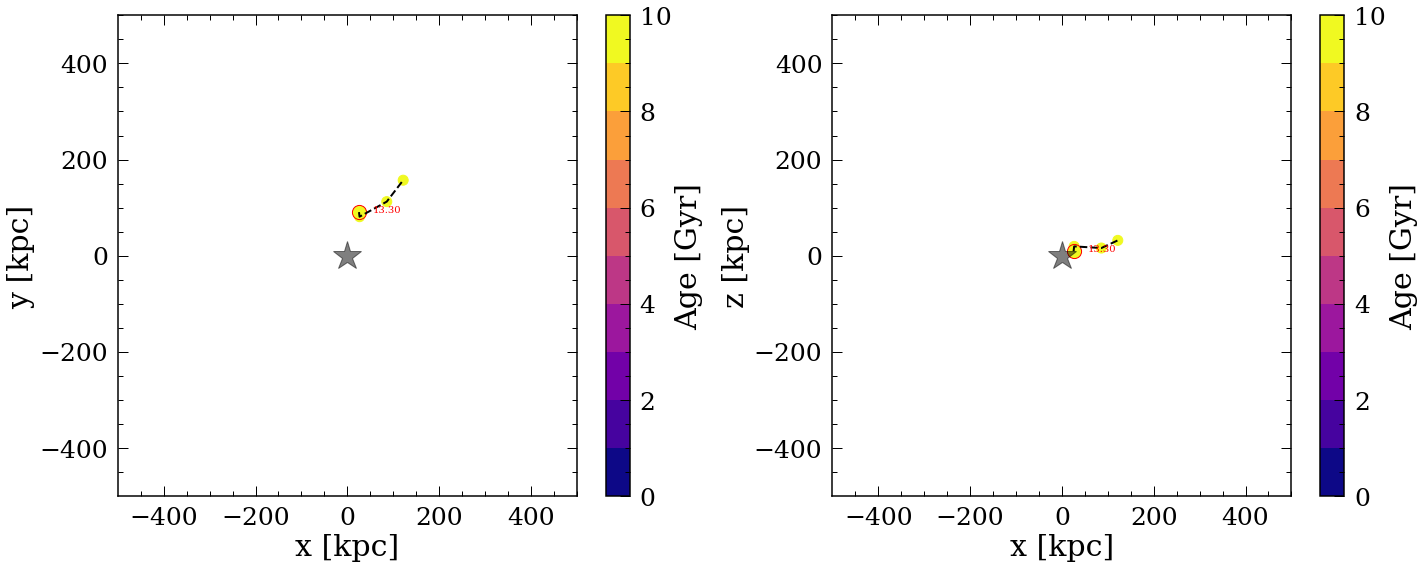

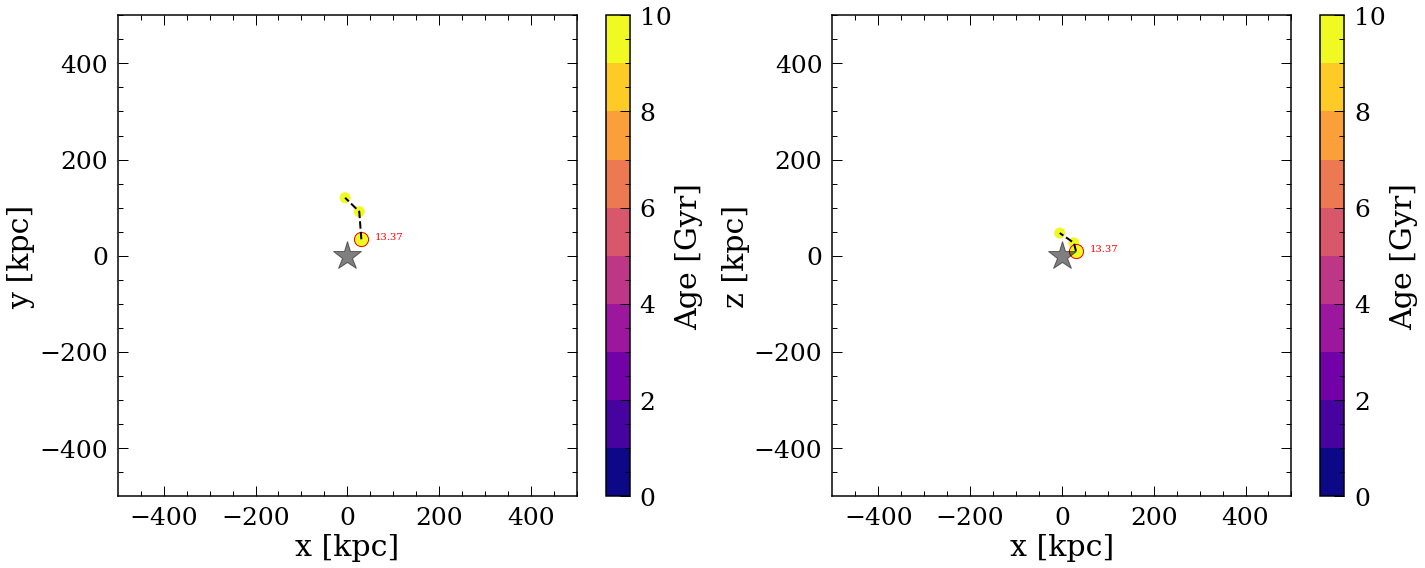

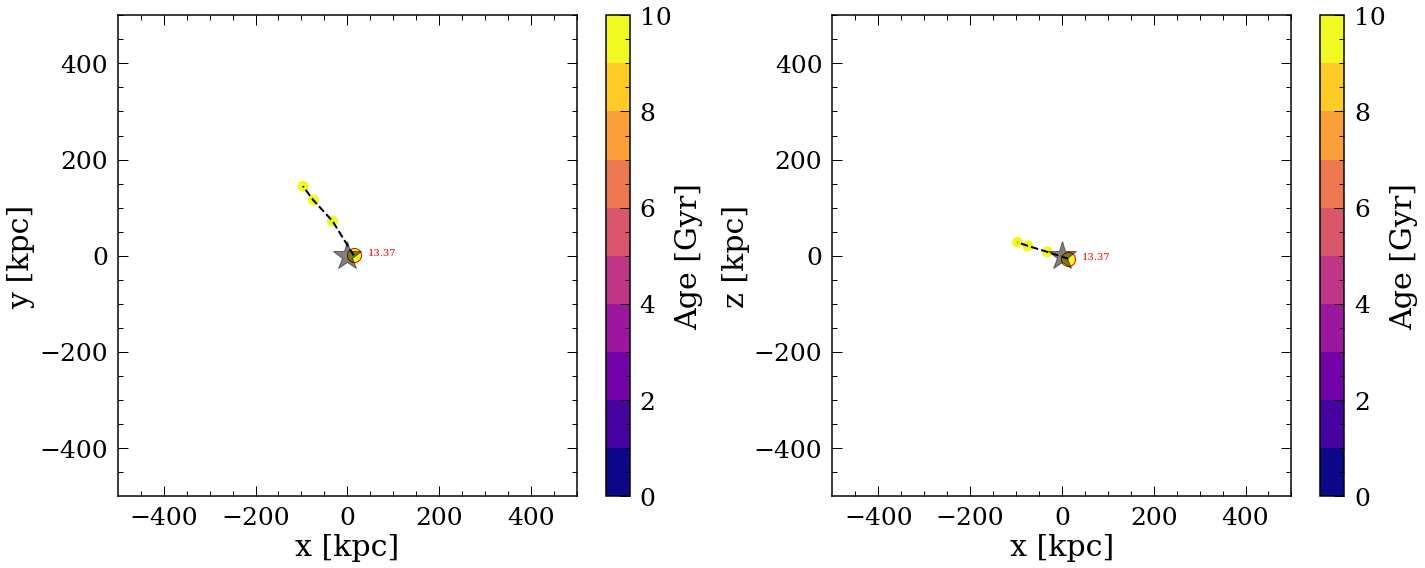

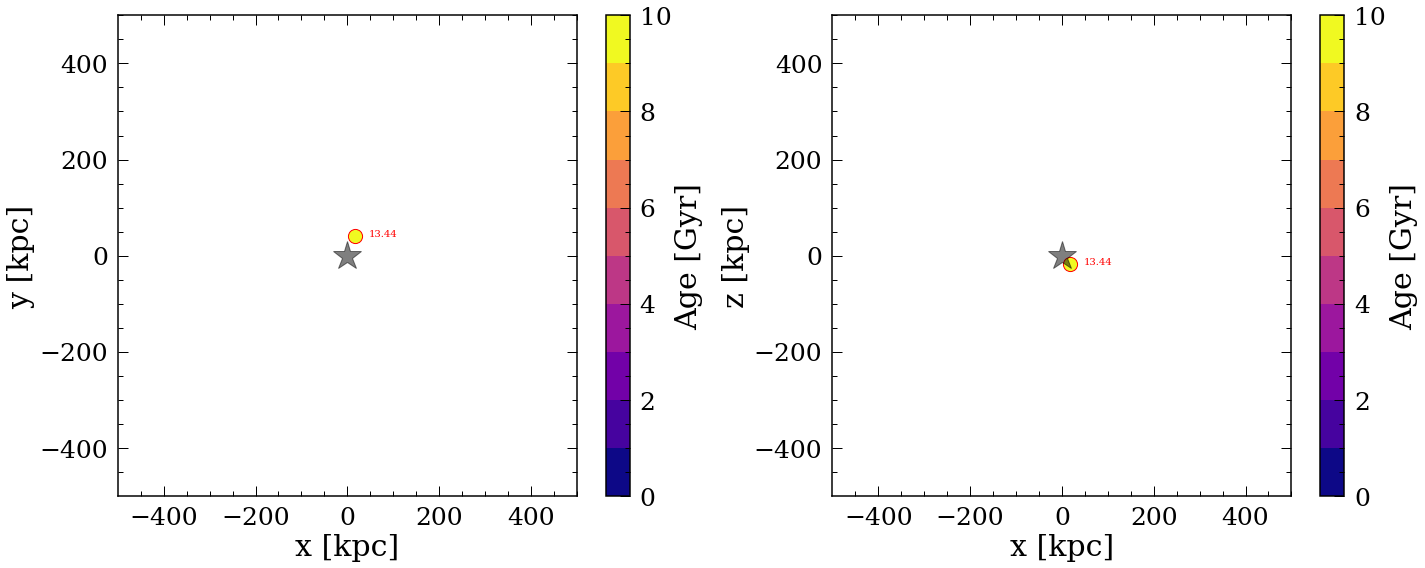

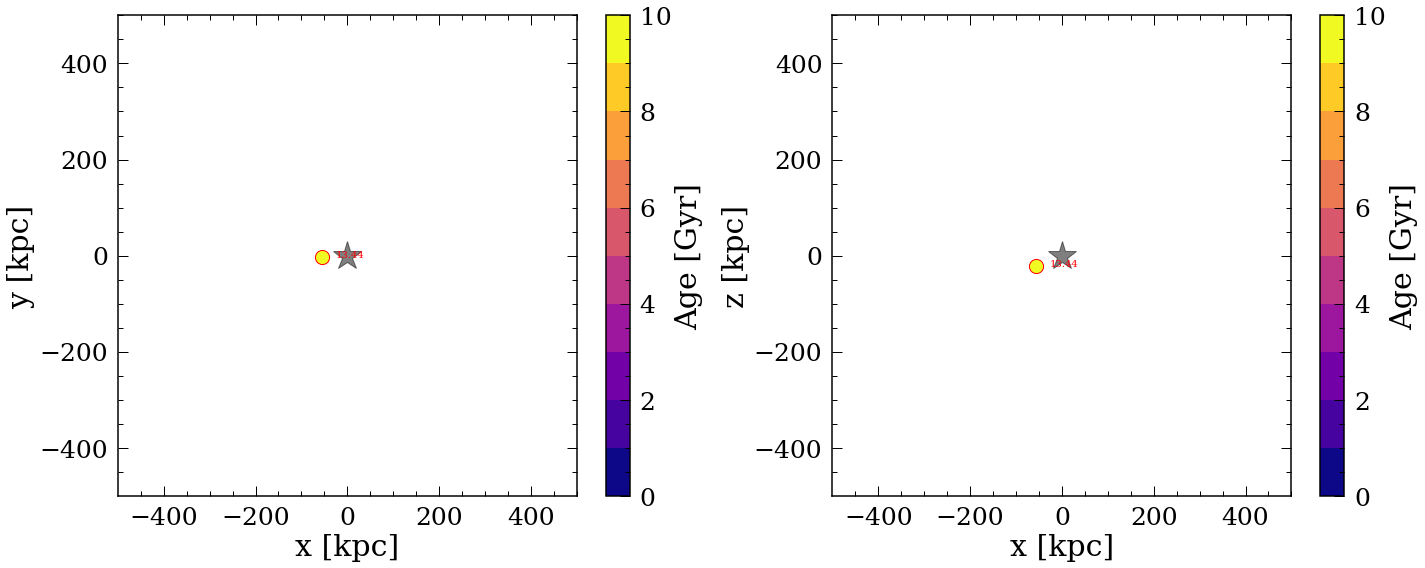

In [463]:
for i in range(len(haloxs)):
    m = (haloredshifts[i]<14)
    if sum(m) == 0:
        continue
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.scatter(haloxs[i][m], haloys[i][m], c=haloredshifts[i][m], s=100,
               vmin=0,vmax=10,cmap=plt.get_cmap('plasma',10))
    
    halox_t = haloxs[i][m]
    haloy_t = haloys[i][m]
    haloz_t = haloredshifts[i][m]
    
    count = 4
    for j in range(len(halox_t)):
        if abs(halox_t[j])<500 and abs(haloy_t[j])<500:
            count = count-1
            if count==0 or j==0:
                plt.text(halox_t[j]+30, haloy_t[j],
                     '%.2f'%(haloz_t[j]),
                    fontsize=10, color='r')
                count = 4

    
    minrs = (haloredshifts[i]).argmin()
    plt.scatter(haloxs[i][minrs], haloys[i][minrs], c=haloredshifts[i][minrs], s=200,
               vmin=0,vmax=10,edgecolor='r',cmap=plt.get_cmap('plasma',10))
    
    plt.plot(haloxs[i][m], haloys[i][m],'k--')
    plt.colorbar(label='Age [Gyr]')
    plt.plot(0, 0, 'k*', markersize=30, alpha=0.5)

    plt.xlim([-500,500])
    plt.ylim([-500,500])
    plt.xlabel('x [kpc]')
    plt.ylabel('y [kpc]')
    
    
    
    
    
    plt.subplot(1,2,2)
    plt.scatter(haloxs[i][m], halozs[i][m], c=haloredshifts[i][m], s=100,
               vmin=0,vmax=10,cmap=plt.get_cmap('plasma',10))
    
    halox_t = haloxs[i][m]
    haloy_t = halozs[i][m]
    haloz_t = haloredshifts[i][m]
    
    count = 4
    for j in range(len(halox_t)):
        if abs(halox_t[j])<500 and abs(haloy_t[j])<500:
            count = count-1
            if count==0 or j==0:
                plt.text(halox_t[j]+30, haloy_t[j],
                     '%.2f'%(haloz_t[j]),
                    fontsize=10, color='r')
                count = 4

    
    minrs = (haloredshifts[i]).argmin()
    plt.scatter(haloxs[i][minrs], halozs[i][minrs], c=haloredshifts[i][minrs], s=200,
               vmin=0,vmax=10,edgecolor='r',cmap=plt.get_cmap('plasma',10))
    
    plt.plot(haloxs[i][m], halozs[i][m],'k--')
    plt.colorbar(label='Age [Gyr]')
    plt.plot(0, 0, 'k*', markersize=30, alpha=0.5)

    plt.xlim([-500,500])
    plt.ylim([-500,500])
    plt.xlabel('x [kpc]')
    plt.ylabel('z [kpc]')

    plt.tight_layout()

    

"""
plt.figure(figsize=(10,8))
checkhalo = 10
m = (haloredshifts[checkhalo]<3)
plt.scatter(haloxs[checkhalo][m], haloys[checkhalo][m], c=haloredshifts[checkhalo][m], s=100)
plt.plot(haloxs[checkhalo][m], haloys[checkhalo][m],'k--')

plt.colorbar(label='redshift')
plt.plot(0, 0, 'ro')

plt.xlim([-500,500])
plt.ylim([-500,500])"""

Text(0, 0.5, 'y [kpc]')

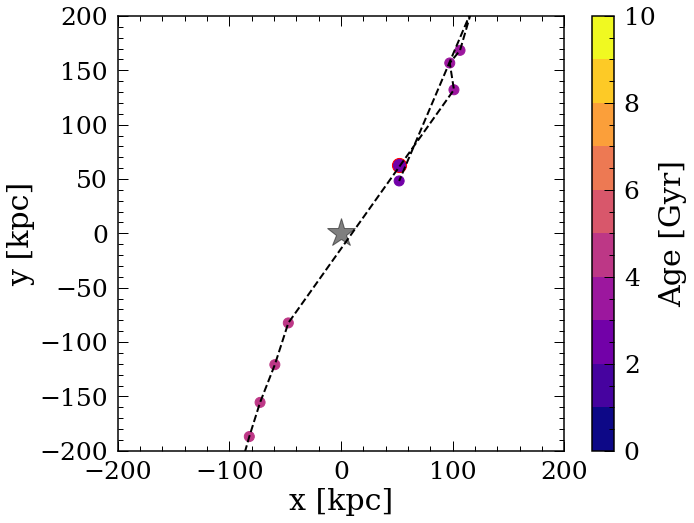

In [460]:

i=0
m = (haloredshifts[i]<14)
plt.figure(figsize=(10,8))
plt.scatter(haloxs[i][m], haloys[i][m], c=haloredshifts[i][m], s=100,
           vmin=0,vmax=10,cmap=plt.get_cmap('plasma',10))

halox_t = haloxs[i][m]
haloy_t = halozs[i][m]
haloz_t = haloredshifts[i][m]


minrs = (haloredshifts[i]).argmin()
plt.scatter(haloxs[i][minrs], halozs[i][minrs], c=haloredshifts[i][minrs], s=200,
           vmin=0,vmax=10,edgecolor='r',cmap=plt.get_cmap('plasma',10))

plt.plot(haloxs[i][m], haloys[i][m],'k--')
plt.colorbar(label='Age [Gyr]')
plt.plot(0, 0, 'k*', markersize=30, alpha=0.5)

plt.xlim([-200,200])
plt.ylim([-200,200])
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')


In [446]:
haloredshifts[i][m]

array([13.50612335, 13.50612335, 13.50612335, 13.43696965, 13.43696965,
       13.43696965, 13.36782047, 13.32632817, 13.29866669, 13.29866669,
       13.22951463, 13.22951463, 13.16036204, 13.09120997, 12.86300621])